<a href="https://colab.research.google.com/github/lucasmoratof/tutorials/blob/master/Tutorial_Binomial_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tutorial - Binomial Distribution

This notebook is part of an article that you can find on my medium profile:

https://medium.com/@lmmfrederico

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Generating the answers for the a group of 10 people:

In [3]:
# we plant the seed for reproducibility
np.random.seed(24)

# generating 10 random numbers between 0 and 1
first_group_answers= np.random.random(size=10)
print(first_group_answers)

# if the number is equal or higher than 0.5, it's a YES
yes_answers= first_group_answers >= 0.5
print(yes_answers)

# Summing up the yes answers for this group
print(f"Total number of positive answers for this group: {np.sum(yes_answers)}")

[0.9600173  0.69951205 0.99986729 0.2200673  0.36105635 0.73984099
 0.99645573 0.31634698 0.13654458 0.38398001]
[ True  True  True False False  True  True False False False]
Total number of positive answers for this group: 5


In [0]:
np.random.seed(24)

trump_wins= 0 # initiating a counter for groups with 6 or more positive answers

for group in range(100000): # creating 100 thousand groups
  answers= np.random.random(size= 10) # each group has 10 independent answers
  yes_answers= np.sum(answers >= 0.5)
  if yes_answers >= 6: # if we have 6 or more yes in that group, we increase our counter by one
    trump_wins += 1

prob_trump_wins = (trump_wins / 100000) * 100

print(f"There's a probability of {round(prob_trump_wins, 2)}% of Trump getting 6 or more supporters in each group.")

There's a probability of 37.7% of Trump getting 6 or more supporters in each group.


In [16]:
np.random.seed(24) 

# calculating the number of successful outcomes (yes answers) for each group 
samples= np.random.binomial(10, 0.5, size= 100000)

# initializing a counter 
trump_wins= 0

for answers in samples:
  if answers >= 6: # if there's 6 or more positive answers, increase the counter by one
    trump_wins += 1

# calculating the probability: number of wins divided by the total samples
prob_trump_wins = (trump_wins / len(samples)) * 100

print(f"There's a probability of {round(prob_trump_wins, 2)}% of Trump getting 6 or more supporters in a group.")

There's a probability of 37.69% of Trump getting 6 or more supporters in each group.


### Simulation with an p= 0.4

In [17]:
np.random.seed(24) 
samples= np.random.binomial(10, 0.4, size= 100000)

trump_wins= 0

for answers in samples:
  if answers >= 6: 
    trump_wins += 1

prob_trump_wins = (trump_wins / len(samples)) * 100

print(f"There's a probability of {round(prob_trump_wins, 2)}% of Trump getting 6 or more supporters in a group.")

There's a probability of 16.76% of Trump getting 6 or more supporters in a group.


#### Simulation with p= 0.6

In [18]:
np.random.seed(24) 
samples= np.random.binomial(10, 0.6, size= 100000)

trump_wins= 0

for answers in samples:
  if answers >= 6: 
    trump_wins += 1

prob_trump_wins = (trump_wins / len(samples)) * 100

print(f"There's a probability of {round(prob_trump_wins, 2)}% of Trump getting 6 or more supporters in a group.")

There's a probability of 63.27% of Trump getting 6 or more supporters in a group.


### ECDF plot

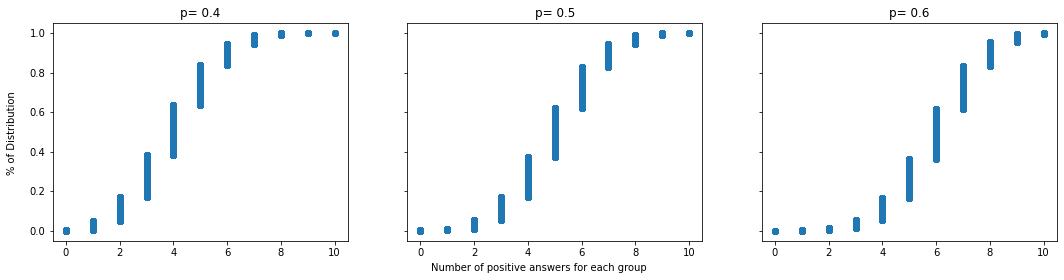

In [60]:
samples_40= np.random.binomial(10, 0.4, size= 100000)
samples_50= np.random.binomial(10, 0.5, size= 100000)
samples_60= np.random.binomial(10, 0.6, size= 100000)

x_40= np.sort(samples_40)
x_50= np.sort(samples_50)
x_60= np.sort(samples_60)
n= x.size
y= np.arange(1, n+1) / n


f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(18,4))
ax1.scatter(x_40, y)
ax1.set_title("p= 0.4")

ax2.scatter(x_50, y)
ax2.set_title("p= 0.5")

ax3.scatter(x_60, y)
ax3.set_title("p= 0.6")

f.text(0.5, 0.02, 'Number of positive answers for each group', ha='center')
f.text(0.09, 0.5, '% of Distribution', va='center', rotation='vertical')
plt.show()